In [1]:

# realSum: the full price of accommodation for two people and two nights in EUR
# room_type: the type of the accommodation
# room_shared: dummy variable for shared rooms
# room_private: dummy variable for private rooms
# person_capacity: the maximum number of guests
# host_is_superhost: dummy variable for superhost status
# multi: dummy variable if the listing belongs to hosts with 2-4 offers
# biz: dummy variable if the listing belongs to hosts with more than 4 offers
# cleanliness_rating: cleanliness rating
# guest_satisfaction_overall: overall rating of the listing
# bedrooms: number of bedrooms (0 for studios)
# dist: distance from city centre in km
# metro_dist: distance from nearest metro station in km
# attr_index: attraction index of the listing location
# attr_index_norm: normalised attraction index (0-100)
# rest_index: restaurant index of the listing location
# attr_index_norm: normalised restaurant index (0-100)
# lng: longitude of the listing location
# lat: latitude of the listing location

In [2]:
! pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

In [4]:
def MergeDatasets():
    files = [f for f in os.listdir("archive")]
    dfs = []

    for file in files:
        fileDf = pd.read_csv("archive/" + file).drop(columns="Unnamed: 0")

        # Split the filename using underscores
        file_parts = file.split("_")

        # Create boolean columns for cities
        for i, part in enumerate(file_parts[:-1]):
            col_name = f"city_{part}"
            fileDf[col_name] = True

        # Create boolean columns for weekdays and weekends
        for part in file_parts[-1:]:
            if part.lower() == "weekends.csv":
                fileDf["is_weekend"] = True
            else:
                fileDf["is_weekend"] = False

        dfs.append(fileDf)

    mainDf = pd.concat(dfs, ignore_index=True)

    # Fill NaN values with False in the boolean columns
    mainDf = mainDf.fillna(False)

    # Save merged DataFrame to CSV
    mainDf.to_csv("DataSet.csv", index=False)

    return mainDf

Data was checked for duplicates and null values and none were found. Also all column data types were checked to see if they required any change and none did.

In [181]:
pd.set_option('display.max_columns', None)
df= MergeDatasets()
df.info()
dfRaw = df.copy()
df.drop_duplicates()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna
0,194.033698,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,False,False,False,False,False,False,False,False,False,False
1,344.245776,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,False,False,False,False,False,False,False,False,False,False
2,264.101422,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,False,False,False,False,False,False,False,False,False,False
3,433.529398,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,False,False,False,False,False,False,False,False,False,False
4,485.552926,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51702,715.938574,Entire home/apt,False,False,6.0,False,0,1,10.0,100.0,3,0.530181,0.135447,219.402478,15.712158,438.756874,10.604584,16.37940,48.21136,False,True,False,False,False,False,False,False,False,False,True
51703,304.793960,Entire home/apt,False,False,2.0,False,0,0,8.0,86.0,1,0.810205,0.100839,204.970121,14.678608,342.182813,8.270427,16.38070,48.20296,False,True,False,False,False,False,False,False,False,False,True
51704,637.168969,Entire home/apt,False,False,2.0,False,0,0,10.0,93.0,1,0.994051,0.202539,169.073402,12.107921,282.296424,6.822996,16.38568,48.20460,False,True,False,False,False,False,False,False,False,False,True
51705,301.054157,Private room,False,True,2.0,False,0,0,10.0,87.0,1,3.044100,0.287435,109.236574,7.822803,158.563398,3.832416,16.34100,48.19200,False,True,False,False,False,False,False,False,False,False,True


In [182]:
# Create a mask filtering out the null values (True if a value is null) then summing the values of each column (True = 1, False = 0)
clue = df.isna().sum()

nrows = len(df)

# Getting the percentage of null values in each column
clue =  clue * 100 / nrows
clue

realSum                       0.0
room_type                     0.0
room_shared                   0.0
room_private                  0.0
person_capacity               0.0
host_is_superhost             0.0
multi                         0.0
biz                           0.0
cleanliness_rating            0.0
guest_satisfaction_overall    0.0
bedrooms                      0.0
dist                          0.0
metro_dist                    0.0
attr_index                    0.0
attr_index_norm               0.0
rest_index                    0.0
rest_index_norm               0.0
lng                           0.0
lat                           0.0
city_amsterdam                0.0
is_weekend                    0.0
city_athens                   0.0
city_barcelona                0.0
city_berlin                   0.0
city_budapest                 0.0
city_lisbon                   0.0
city_london                   0.0
city_paris                    0.0
city_rome                     0.0
city_vienna   

**1) Data Analysis:**

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

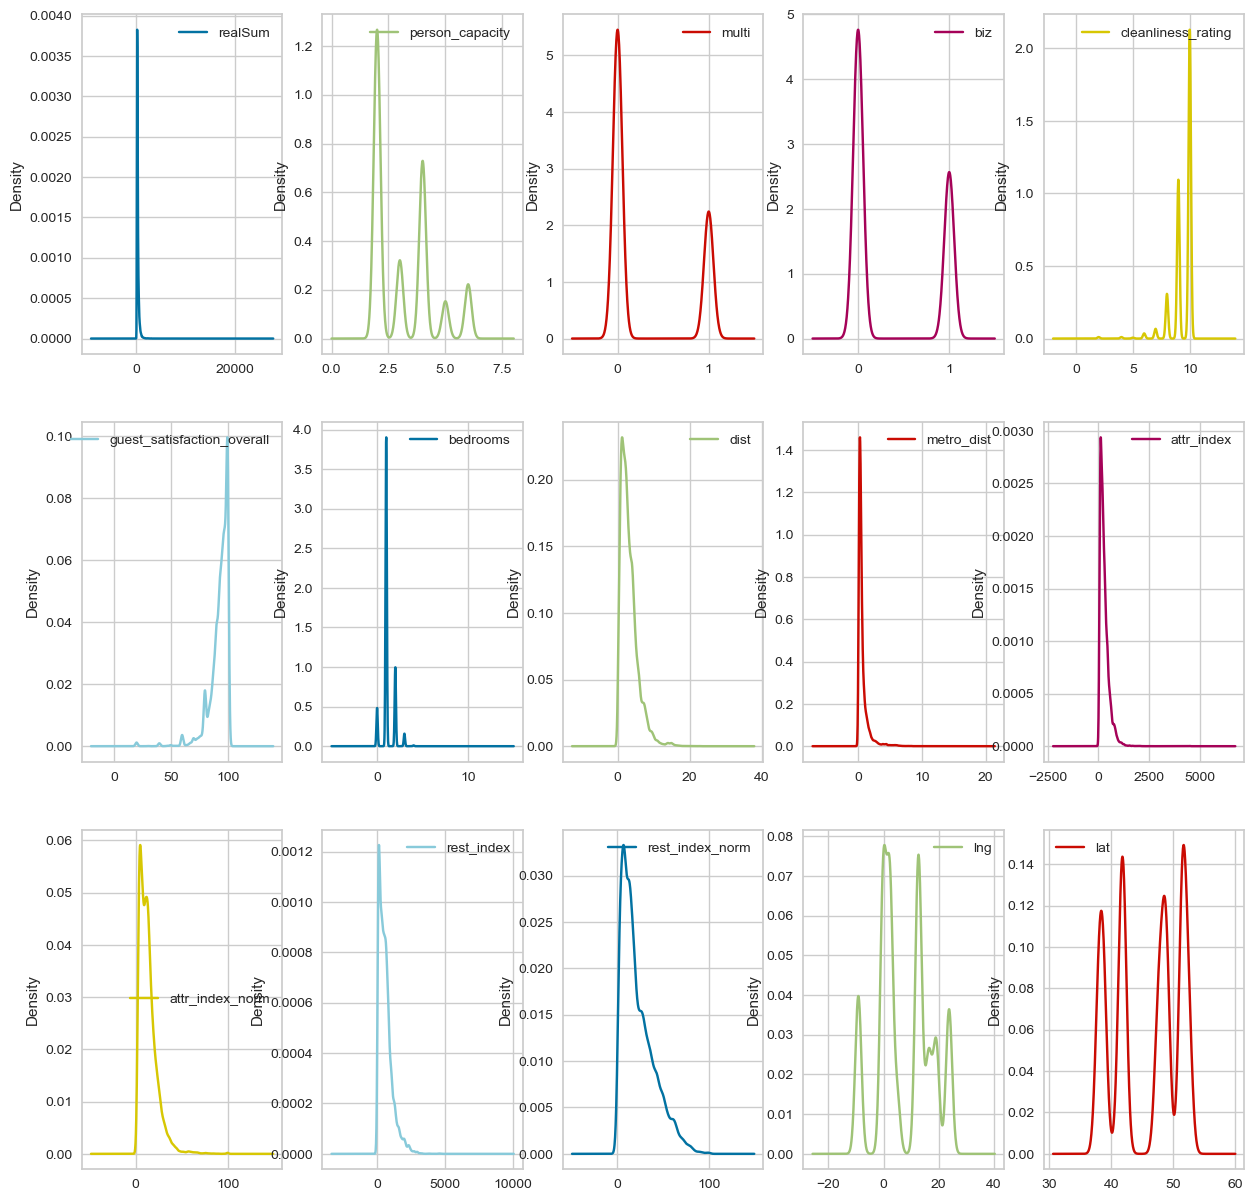

In [183]:
df.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))

Density plots shows that realSum, dist, metro_dist seem to have outliers on which IQR analysis will be used while there are some columns like multi, biz and person_capacity are categories. We also have cleanliness_rating which is a scale to 10.

IQR on realSum:

Outlier Percentage in realSum 7.082213239986846 %
Number of records with outliers: 3662


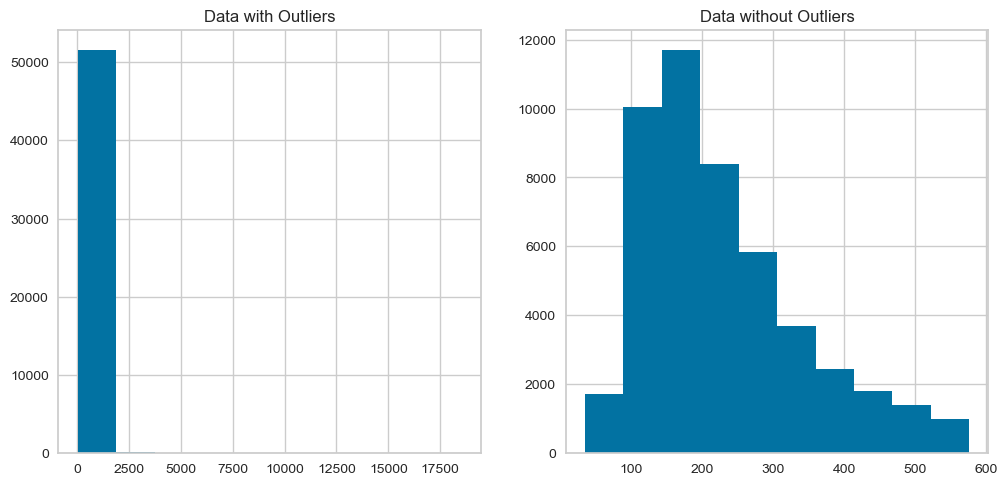

In [184]:
Q1 = np.percentile(df.realSum, 25)
Q3 = np.percentile(df.realSum, 75)
IQR = Q3 - Q1
df_clean = df[(df.realSum > Q1 - 1.5 * IQR) & (df.realSum < Q3 + 1.5 * IQR)].copy()
plt.figure().set_figwidth(12)
plt.subplot(1,2,1)
plt.hist(df.realSum)
plt.title('Data with Outliers')
plt.subplot(1,2,2)
plt.hist(df_clean.realSum)
plt.title('Data without Outliers')
outlier_percentage = 1 - (len(df_clean) / len(df))
print('Outlier Percentage in realSum' , (outlier_percentage*100),'%')
print('Number of records with outliers:', round((len(df)*outlier_percentage)))

Since the oulier percentage in the realsum is (3662 records), and we
dropped them.

IQR on metro_dist:

Outlier Percentage in metro_dist 9.768503297425879 %
Number of records with outliers: 5051


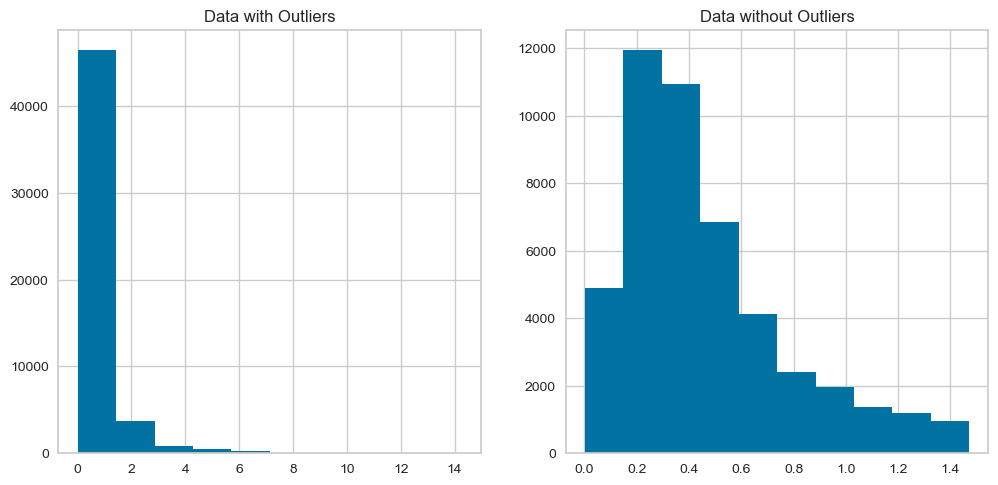

In [185]:
Q1 = np.percentile(df.metro_dist, 25)
Q3 = np.percentile(df.metro_dist, 75)
IQR = Q3 - Q1
df_clean_metro = df[(df.metro_dist> Q1 - 1.5 * IQR) & (df.metro_dist < Q3 + 1.5 * IQR)]
plt.figure().set_figwidth(12)
plt.subplot(1,2,1)
plt.hist(df.metro_dist)
plt.title('Data with Outliers')
plt.subplot(1,2,2)
plt.hist(df_clean_metro.metro_dist)
plt.title('Data without Outliers')
outlier_percentage = 1 - (len(df_clean_metro) / len(df))
print('Outlier Percentage in metro_dist' , (outlier_percentage*100),'%')
print('Number of records with outliers:', round((len(df)*outlier_percentage)))

The percentage of outliners in metro_dist is small, we will not remove them because metro_distance from Airbinb is an important metric to be considered.

**2) Data Cleaning:**

In [186]:
df_clean[~df_clean.room_private & df_clean.room_type == "Private room"]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


In [187]:
df_clean[(df_clean.room_private & df_clean.room_type == "Shared Room") | (df_clean.room_private & df_clean.room_type == "Entire room/apt")]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


The first expression filters the DataFrame to include only rows where the room is not private (room_private = 'false') and the room_type is 'Private room'. This expression returns with no rows, showing that all columns with room_type 'Private room' will always have the value 'true' in the room_private column.

The second expression filters the DataFrame to include only rows where the room is private (room_private = 'true') and the room type is either 'Shared Room' or 'Entire room/apt', since the 'room_type' column only contains these two other values (in addition to 'Private room' mentioned earlier). This expression also returns with no rows.

Therefore, we can observe a correlation between the 'room_type' and 'room_private' columns. The 'room_private' column only contains the value 'true' when the 'room_type' is 'Private room,' while it contains the value 'false' for any other type of 'room_type'.

In [188]:
df_clean[~df_clean.room_shared & df_clean.room_type == "Shared room"]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


In [189]:
df_clean[(df_clean.room_shared & df_clean.room_type == "Private room") | (df_clean.room_shared & df_clean.room_type == "Entire room/apt")]

,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna


Similarly, the first expression filters the DataFrame to include only rows where the room is not shared (room_shared = 'false'), and the room type is 'Shared room'. This expression returns with no rows, showing that all columns with room_type 'Shared room' will always have the value 'true' in the room_shared column.

The second expression filters the DataFrame to include only rows where the room is shared (room_shared = 'true') and the room type is either 'Private Room' or 'Entire room/apt'. This expression also returns with no rows.

Therefore, we can observe a correlation between the 'room_type' and 'room_shared' columns. The 'room_shared' column only contains the value 'true' when the 'room_type' is 'Shared room,' while it contains the value 'false' for any other type of 'room_type'.


We can deduce that the 'room_type' column is one-hot encoded into 'room_private' and 'room_shared'. Since machine learning models do not read string values directly, we will create a new one-hot column for the remaining value in 'room_type' ('Entire room/apt'). Afterward, we will remove the 'room_type' column.

In [190]:
df_clean["room_entire_home_apt"] = df_clean.room_type == "Entire home/apt"

In [191]:
to_drop = ['room_type']
df_clean = df_clean.drop(to_drop, axis=1)
df_clean.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473,4.90569,52.41772,True,False,False,False,False,False,False,False,False,False,False,False
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928,4.90005,52.37432,True,False,False,False,False,False,False,False,False,False,False,False
2,264.101422,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700,4.97512,52.36103,True,False,False,False,False,False,False,False,False,False,False,False
3,433.529398,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565,4.89417,52.37663,True,False,False,False,False,False,False,False,False,False,False,False
4,485.552926,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677,4.90051,52.37508,True,False,False,False,False,False,False,False,False,False,False,False


We will aslo drop the normalized columns as, it is better to create the normalized fields when we need them and to choose on which fields we want to normalize.

In [192]:
to_drop = ['attr_index_norm', 'rest_index_norm' ]
df_clean = df_clean.drop(to_drop, axis=1)
df_clean.head()

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,194.033698,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,98.253896,4.90569,52.41772,True,False,False,False,False,False,False,False,False,False,False,False
1,344.245776,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,837.280757,4.90005,52.37432,True,False,False,False,False,False,False,False,False,False,False,False
2,264.101422,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,95.386955,4.97512,52.36103,True,False,False,False,False,False,False,False,False,False,False,False
3,433.529398,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,875.033098,4.89417,52.37663,True,False,False,False,False,False,False,False,False,False,False,False
4,485.552926,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,815.305740,4.90051,52.37508,True,False,False,False,False,False,False,False,False,False,False,False


In [193]:
for column_name in df_clean.columns:
    df_clean[column_name] = df_clean[column_name].astype(int)

df_clean

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,194,0,1,2,0,1,0,10,93,1,5,2,78,98,4,52,1,0,0,0,0,0,0,0,0,0,0,0
1,344,0,1,4,0,0,0,8,85,1,0,0,631,837,4,52,1,0,0,0,0,0,0,0,0,0,0,0
2,264,0,1,2,0,0,1,9,87,1,5,3,75,95,4,52,1,0,0,0,0,0,0,0,0,0,0,0
3,433,0,1,4,0,0,1,9,90,2,0,0,493,875,4,52,1,0,0,0,0,0,0,0,0,0,0,0
4,485,0,1,2,1,0,0,10,98,1,0,0,552,815,4,52,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,463,0,0,5,0,1,0,10,90,2,1,0,176,283,16,48,0,1,0,0,0,0,0,0,0,0,1,1
51700,115,0,1,4,0,1,0,9,94,1,3,0,109,208,16,48,0,1,0,0,0,0,0,0,0,0,1,0
51703,304,0,0,2,0,0,0,8,86,1,0,0,204,342,16,48,0,1,0,0,0,0,0,0,0,0,1,1
51705,301,0,1,2,0,0,0,10,87,1,3,0,109,158,16,48,0,1,0,0,0,0,0,0,0,0,1,0


We changed columns of type boolean to int for the machine learning model to be able to understand.

**Normalization**

In [194]:
df_norm = df_clean.copy()
for column_name in df_norm.columns:
    df[column_name] = df_norm[column_name]
    min_val = df_norm[column_name].min()
    max_val = df_norm[column_name].max()
    df_norm[column_name] = (df_norm[column_name] - min_val) / (max_val - min_val)

df_norm

,realSum,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,0.295203,0.0,1.0,0.00,0.0,1.0,0.0,1.000,0.9125,0.1,0.20,0.142857,0.014006,0.011832,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.571956,0.0,1.0,0.50,0.0,0.0,0.0,0.750,0.8125,0.1,0.00,0.000000,0.136950,0.122510,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.424354,0.0,1.0,0.00,0.0,0.0,1.0,0.875,0.8375,0.1,0.20,0.214286,0.013339,0.011382,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.736162,0.0,1.0,0.50,0.0,0.0,1.0,0.875,0.8750,0.2,0.00,0.000000,0.106269,0.128201,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.832103,0.0,1.0,0.00,1.0,0.0,0.0,1.000,0.9750,0.1,0.00,0.000000,0.119386,0.119215,0.40625,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51697,0.791513,0.0,0.0,0.75,0.0,1.0,0.0,1.000,0.8750,0.2,0.04,0.000000,0.035794,0.039539,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
51700,0.149446,0.0,1.0,0.50,0.0,1.0,0.0,0.875,0.9250,0.1,0.12,0.000000,0.020898,0.028306,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
51703,0.498155,0.0,0.0,0.00,0.0,0.0,0.0,0.750,0.8250,0.1,0.00,0.000000,0.042019,0.048375,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
51705,0.492620,0.0,1.0,0.00,0.0,0.0,0.0,1.000,0.8375,0.1,0.12,0.000000,0.020898,0.020818,0.78125,0.733333,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


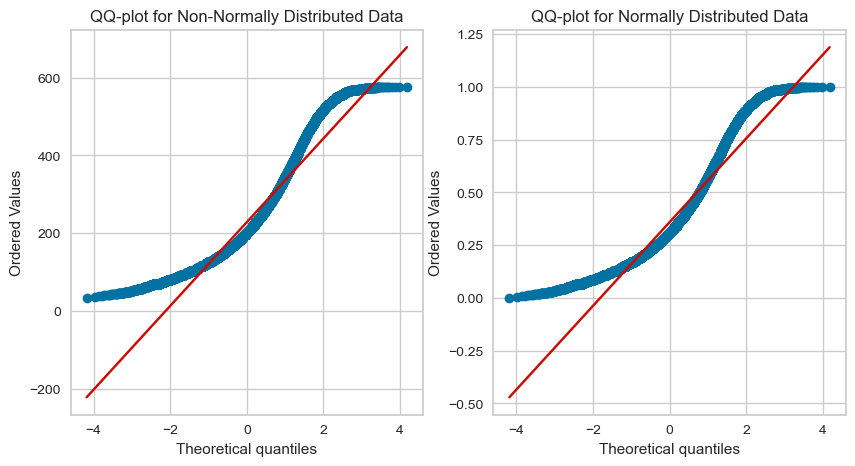

In [179]:
from scipy import stats


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

stats.probplot(df_clean.realSum, plot=axs[0])
axs[0].set_title('QQ-plot for Non-Normally Distributed Data')

stats.probplot(df_norm.realSum, plot=axs[1])
axs[1].set_title('QQ-plot for Normally Distributed Data')

plt.show()

We know that the realsum is a continuous attribute, we also have metro_distance, dist and attr_index. We will create QQ plots to see if they are normally distributed.

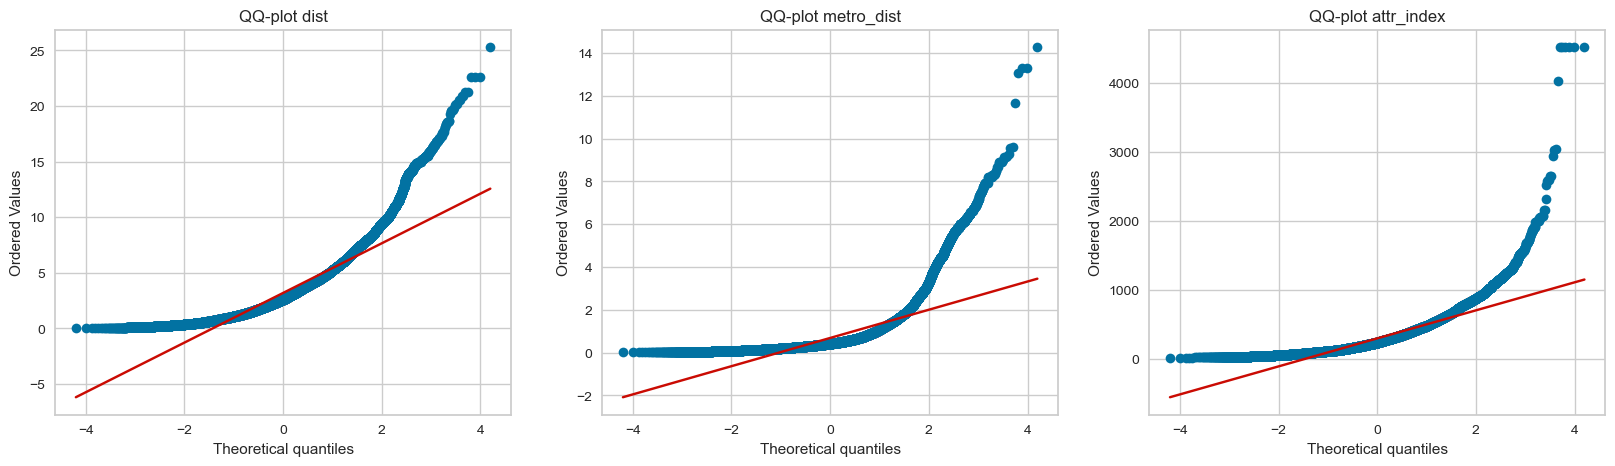

In [195]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

stats.probplot(dfRaw.dist, plot=axs[0])
axs[0].set_title('QQ-plot dist')

stats.probplot(dfRaw.metro_dist, plot=axs[1])
axs[1].set_title('QQ-plot metro_dist')

stats.probplot(dfRaw.attr_index, plot=axs[2])
axs[2].set_title('QQ-plot attr_index')

plt.show()

The QQ plots show that none of them are normally distributed

**3) PCA**

In [19]:
labels = df_norm['realSum'].copy().reset_index(drop=True)

df_2 = df_norm.drop(['realSum'], axis=1)

df_2.head()

,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,rest_index,lng,lat,city_amsterdam,is_weekend,city_athens,city_barcelona,city_berlin,city_budapest,city_lisbon,city_london,city_paris,city_rome,city_vienna,room_entire_home_apt
0,0.0,1.0,0.0,0.0,1.0,0.0,1.000,0.9125,0.1,0.2,0.142857,0.014006,0.011832,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.5,0.0,0.0,0.0,0.750,0.8125,0.1,0.0,0.000000,0.136950,0.122510,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.875,0.8375,0.1,0.2,0.214286,0.013339,0.011382,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.5,0.0,0.0,1.0,0.875,0.8750,0.2,0.0,0.000000,0.106269,0.128201,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.000,0.9750,0.1,0.0,0.000000,0.119386,0.119215,0.40625,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:

from sklearn.decomposition import PCA

pca2 = PCA(n_components=2)

df_pca2 = pca2.fit_transform(df_2)

df_5 = pd.DataFrame(df_pca2, columns=['PC1', 'PC2'])

# add the labels back to the iris dataframe
df_5['realSum'] = labels

df_5.head()

,PC1,PC2,realSum
0,1.097041,0.497775,0.295203
1,0.806462,-0.146623,0.571956
2,0.872806,-0.746877,0.424354
3,0.699778,-0.793459,0.736162
4,0.823184,0.130008,0.832103


In [20]:

from sklearn.decomposition import PCA

pca5 = PCA(n_components=5)

df_pca5 = pca5.fit_transform(df_norm)

df_2 = pd.DataFrame(df_pca5, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# add the labels back to the iris dataframe
df_2['realSum'] = labels

df_2.head()

,PC1,PC2,PC3,PC4,PC5,realSum
0,1.094227,0.520978,-0.056414,-0.572520,0.206663,0.295203
1,0.823424,-0.109815,-0.035572,-0.569044,-0.055781,0.571956
2,0.881301,-0.748204,0.266850,-0.481162,-0.242617,0.424354
3,0.727646,-0.767112,0.245247,-0.488545,-0.191477,0.736162
4,0.851397,0.177221,0.114925,-0.504074,-0.572995,0.832103


In [21]:
pca5.explained_variance_ratio_.sum()

0.6119644439249396

We started by using variance 5 to calculate PCA. This value is low to we will increase it.

In [22]:
pca10 = PCA(n_components=10)

df_pca10 = pca10.fit_transform(df_norm)

df_3 = pd.DataFrame(df_pca10, columns=["PC"+str(i) for i in range(10)])

df_3['realSum'] = labels

df_3.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,realSum
0,1.094227,0.520979,-0.056407,-0.572515,0.206646,-0.114327,0.205765,-0.036612,0.326169,0.042484,0.295203
1,0.823423,-0.109809,-0.035557,-0.569088,-0.055833,-0.187305,0.198151,0.255538,-0.025544,-0.359967,0.571956
2,0.881301,-0.748200,0.266861,-0.481175,-0.242649,-0.146412,0.141645,0.145514,0.319761,0.072473,0.424354
3,0.727646,-0.767109,0.245254,-0.488563,-0.191503,-0.144017,0.029349,0.097252,0.378127,0.099207,0.736162
4,0.851396,0.177224,0.114931,-0.504098,-0.573018,0.525438,-0.053292,0.627466,-0.080828,-0.217058,0.832103


In [23]:
pca10.explained_variance_ratio_.sum()

0.8643871764933161

We then used variance 10 to calculate PCA. This value is still low to we will increase it.

In [24]:
pca12 = PCA(n_components=12)

df_pca12 = pca12.fit_transform(df_norm)

df_4 = pd.DataFrame(df_pca12, columns=["PC"+str(i) for i in range(12)])

df_4['realSum'] = labels

df_4.head()

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,realSum
0,1.094227,0.520979,-0.056407,-0.572515,0.206646,-0.114327,0.205765,-0.036612,0.326169,0.042484,0.090072,-0.012776,0.295203
1,0.823423,-0.109809,-0.035557,-0.569088,-0.055833,-0.187305,0.198151,0.255538,-0.025544,-0.359967,0.186112,0.551051,0.571956
2,0.881301,-0.748200,0.266861,-0.481175,-0.242649,-0.146412,0.141645,0.145514,0.319761,0.072473,0.103796,0.008441,0.424354
3,0.727646,-0.767109,0.245254,-0.488563,-0.191503,-0.144017,0.029349,0.097252,0.378127,0.099207,0.233626,0.518814,0.736162
4,0.851396,0.177224,0.114931,-0.504098,-0.573018,0.525438,-0.053292,0.627466,-0.080828,-0.217058,0.161890,0.203409,0.832103


In [25]:
pca12.explained_variance_ratio_.sum()

0.9195395067758149

The last value we used was 12 and the value is a good variance value because it kept about 92% of the data.

**Clustering**

### KMeans

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

We will attempt to find the ideal cluster count using the elbow method.

Text(0, 0.5, 'WCSS')

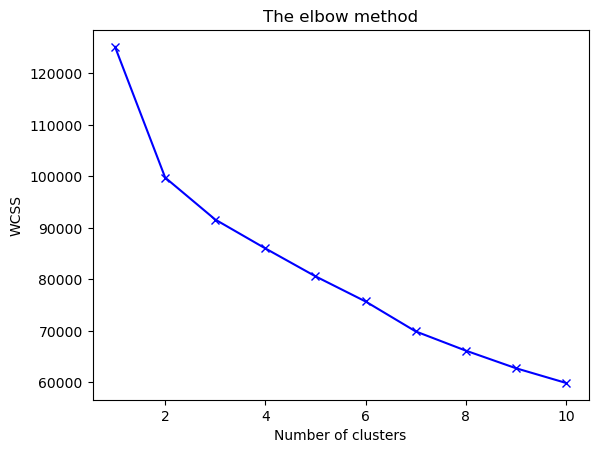

In [27]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(df_norm.drop("realSum", axis=1))
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares


Using the graph above, the ideal cluster count could be 2 or 6. Silhouette score will be used to decide which is better.



In [28]:
from sklearn.metrics import silhouette_score

km2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
km6 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
y2 = km2.fit_predict(df_norm.drop("realSum", axis=1))
y6 = km6.fit_predict(df_norm.drop("realSum", axis=1))
score2 = silhouette_score(df_norm.drop("realSum", axis=1), km2.labels_)
score6 = silhouette_score(df_norm.drop("realSum", axis=1), km6.labels_)

print('Silhouette Score @ 2: %.3f' % score2)
print('Silhouette Score @ 6: %.3f' % score6)

Silhouette Score @ 2: 0.203
Silhouette Score @ 6: 0.175


Since a cluster count of 2 has a higher silhouette score, a cluster count of 2 will be used moving forward.

c:\Users\Mostafa\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


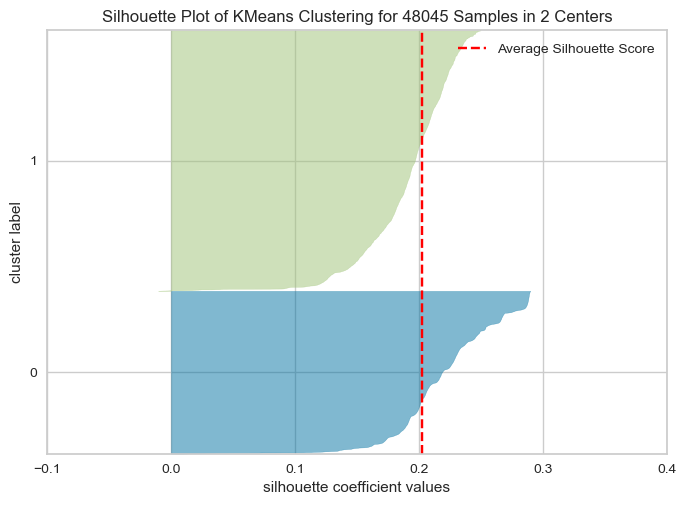

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 48045 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer = SilhouetteVisualizer(km2, colors='yellowbrick')
visualizer.fit(df_norm.drop('realSum', axis=1))
visualizer.show()

In [143]:
from sklearn.metrics import davies_bouldin_score 
davies_bouldin_score(df_norm.drop(columns="realSum"), km2.labels_)

0.4919231281726357

The same cluster count is used with the PCA data

In [32]:
km2pca = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y2pca = km2pca.fit_predict(df_4.drop("realSum", axis=1))
silhouette_score(df_4.drop("realSum", axis=1), km2pca.labels_)

0.21599115151112905

In [147]:
davies_bouldin_score(df_4.drop(columns="realSum"), km2pca.labels_)

19.589427042842814

In [146]:
km2pca2 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y2pca2 = km2pca2.fit_predict(df_5.drop("realSum", axis=1))
silhouette_score(df_5.drop("realSum", axis=1), km2pca2.labels_)

0.8988872635795786

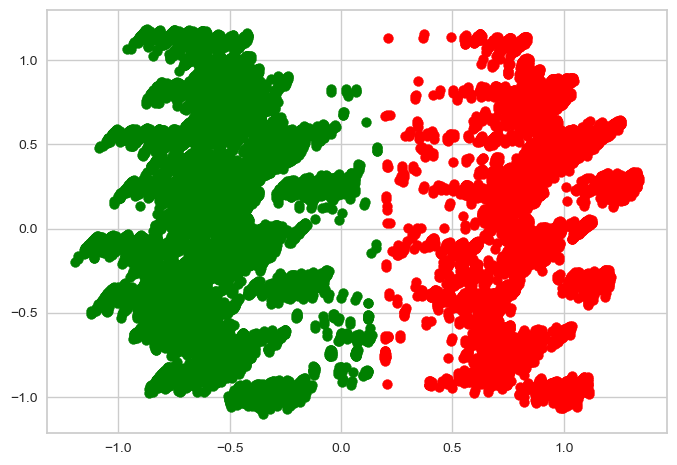

In [136]:
KmeansVisualizasion = df_5.copy()
KmeansVisualizasion["cluster"] = km2pca2.labels_
plt.scatter(KmeansVisualizasion[KmeansVisualizasion.cluster == 0].PC1, KmeansVisualizasion[KmeansVisualizasion.cluster == 0].PC2, c="green", s = 50)
plt.scatter(KmeansVisualizasion[KmeansVisualizasion.cluster == 1].PC1, KmeansVisualizasion[KmeansVisualizasion.cluster == 1].PC2, c="red", s = 50)

The PCA did help the clustering

### KModes

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 0, cost: 465364.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 8, ite

Text(0, 0.5, 'cost')

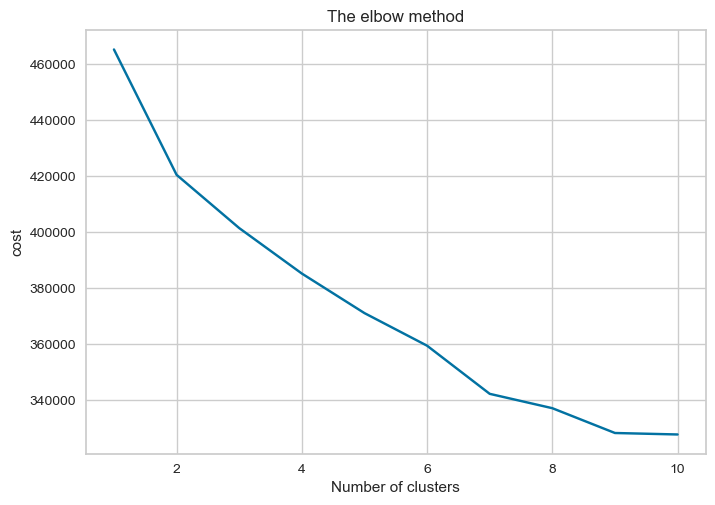

In [33]:
from kmodes.kmodes import KModes
wcss = []
for i in range(1, 11):
    kmodes = KModes(n_clusters=i, init='random', n_init=10, verbose=1)
    kmodes.fit_predict(df_norm.drop("realSum", axis=1))
    wcss.append(kmodes.cost_)

plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('cost') #within cluster sum of squares

In [34]:
from sklearn.metrics import silhouette_score

kmode5 = KModes(n_clusters=5, init='random', max_iter=300, n_init=10, verbose=1)
kmode7 = KModes(n_clusters=7, init='random', max_iter=300, n_init=10, verbose=1)
ymode5 = kmode5.fit_predict(df_norm.drop("realSum", axis=1))
ymode7 = kmode7.fit_predict(df_norm.drop("realSum", axis=1))
score5 = silhouette_score(df_norm.drop("realSum", axis=1), kmode5.labels_)
score7 = silhouette_score(df_norm.drop("realSum", axis=1), kmode7.labels_)

print('Silhouette Score @ 5: %.3f' % score5)
print('Silhouette Score @ 7: %.3f' % score7)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/300, moves: 13205, cost: 375084.0
Run 1, iteration: 2/300, moves: 6967, cost: 371208.0
Run 1, iteration: 3/300, moves: 3057, cost: 371208.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/300, moves: 14099, cost: 380234.0
Run 2, iteration: 2/300, moves: 4604, cost: 377764.0
Run 2, iteration: 3/300, moves: 4233, cost: 377150.0
Run 2, iteration: 4/300, moves: 59, cost: 377150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/300, moves: 17505, cost: 380708.0
Run 3, iteration: 2/300, moves: 4444, cost: 380708.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/300, moves: 10538, cost: 379727.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/300, moves: 13889, cost: 372966.0
Run 5, iterati

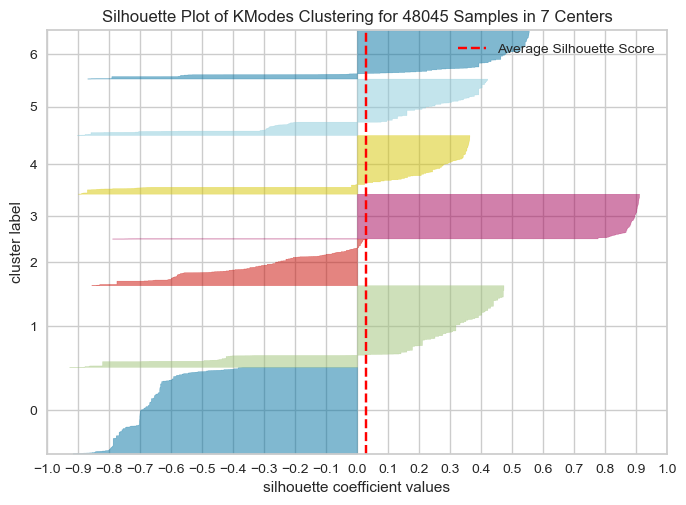

<Axes: title={'center': 'Silhouette Plot of KModes Clustering for 48045 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [72]:
visualizer = SilhouetteVisualizer(kmode7, colors='yellowbrick')
visualizer.fit(df_norm.drop('realSum', axis=1), ymode7)
visualizer.show()

Since a cluster count of 7 has a higher silhouette score, a cluster count of 7 will be used moving forward.

In [35]:
kmodes7pca = KModes(n_clusters=7, init='random', max_iter=300, n_init=10)
y7pca = kmodes7pca.fit_predict(df_4.drop("realSum", axis=1))
silhouette_score(df_4.drop("realSum", axis=1), kmodes7pca.labels_)

-0.26656676283370045

In [148]:
davies_bouldin_score(df_4.drop(columns="realSum"), kmodes7pca.labels_)

1.2976057498565194

The PCA made the clustering much worse

In [137]:
kmodes7pca2 = KModes(n_clusters=7, init='random', max_iter=300, n_init=10)
y7pca2 = kmodes7pca2.fit_predict(df_5.drop("realSum", axis=1))
silhouette_score(df_5.drop("realSum", axis=1), kmodes7pca2.labels_)

-0.722939003068469

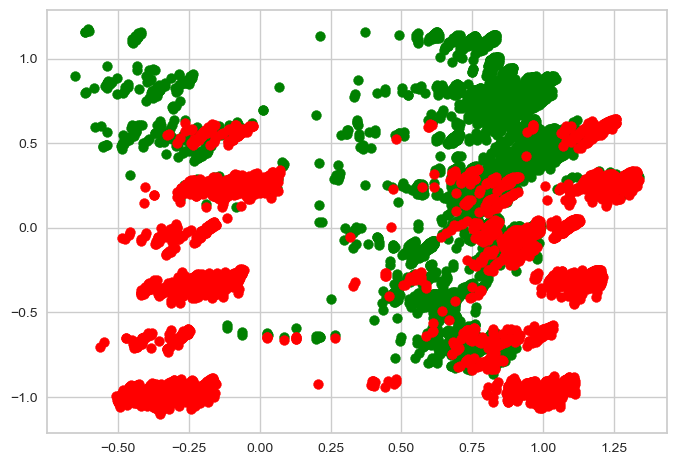

In [138]:
kmodesVisualization = df_5.copy()
kmodesVisualization["cluster"] = kmode7.labels_
plt.scatter(kmodesVisualization[kmodesVisualization.cluster == 0].PC1, kmodesVisualization[kmodesVisualization.cluster == 0].PC2, c="green", s = 50)
plt.scatter(kmodesVisualization[kmodesVisualization.cluster == 1].PC1, kmodesVisualization[kmodesVisualization.cluster == 1].PC2, c="red", s = 50)

### DBSCAN

First we attempt to find the best epsilon value to use in the DBSCAN clustering algorithm using the K-distance graph

Text(0, 0.5, 'Epsilon')

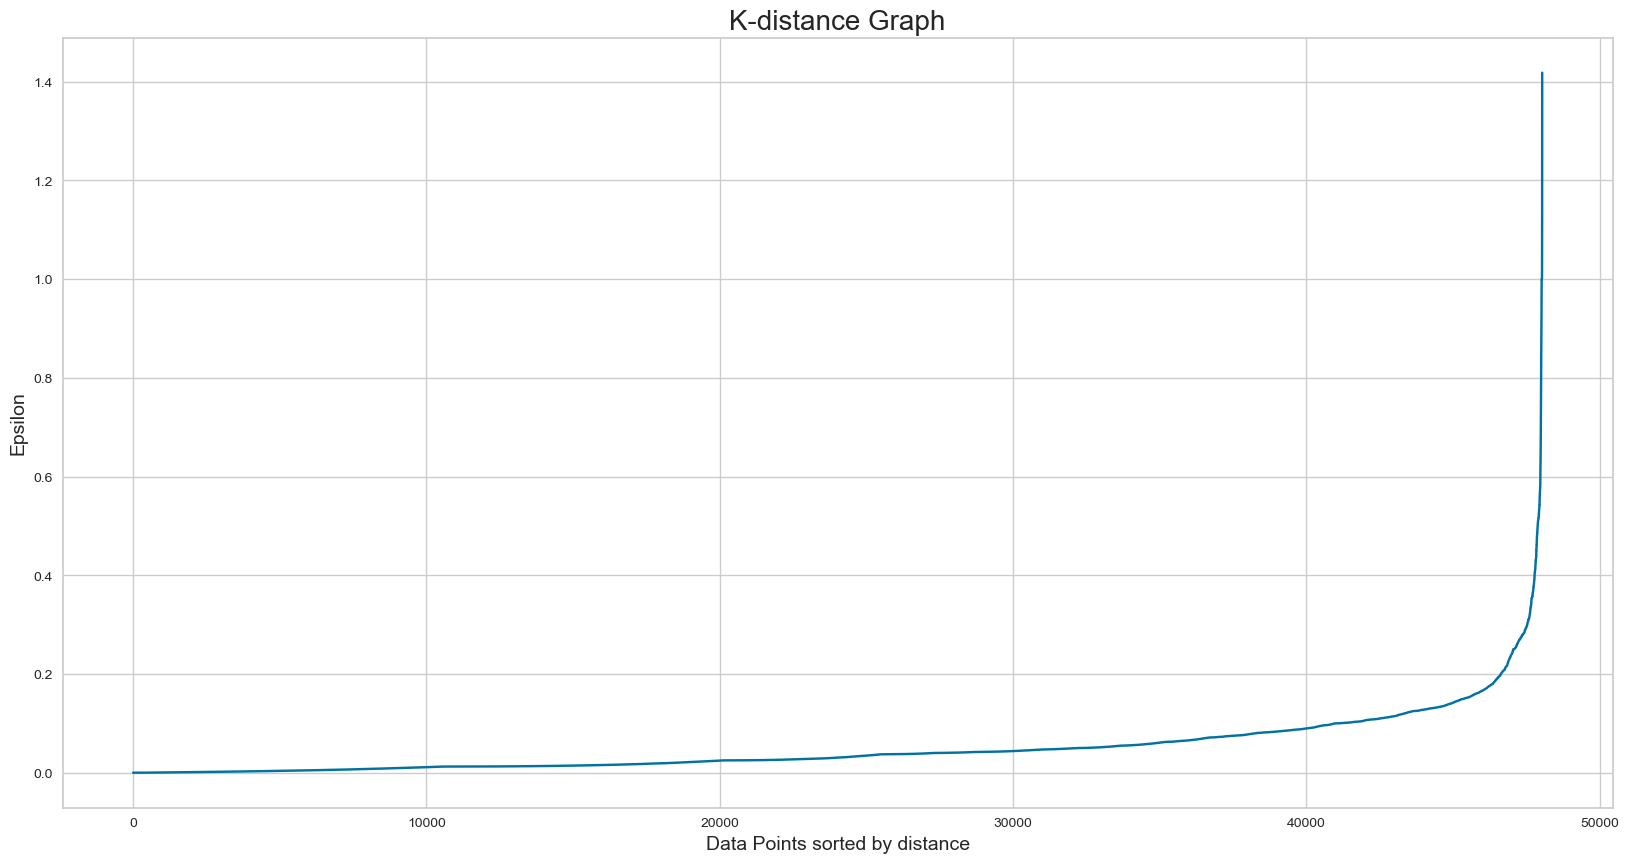

In [36]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_norm.drop("realSum", axis=1))


distances, indices = nbrs.kneighbors(df_norm.drop("realSum", axis=1))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

Here we can see that a good epsilon is at 0.2 and will be used in the DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2)
dbscan.fit(df_norm.drop("realSum", axis=1))
df_norm['DBSCANlabels']=dbscan.labels_
silhouette_score(df_norm.drop("realSum", axis=1), dbscan.labels_)

0.8223965783629216

In [73]:
len(pd.Series(dbscan.labels_).value_counts())

722

The number of clusters is 722 and cannot be visualised

We will now repeat the DBSCAN algorithm using PCAs

Text(0, 0.5, 'Epsilon')

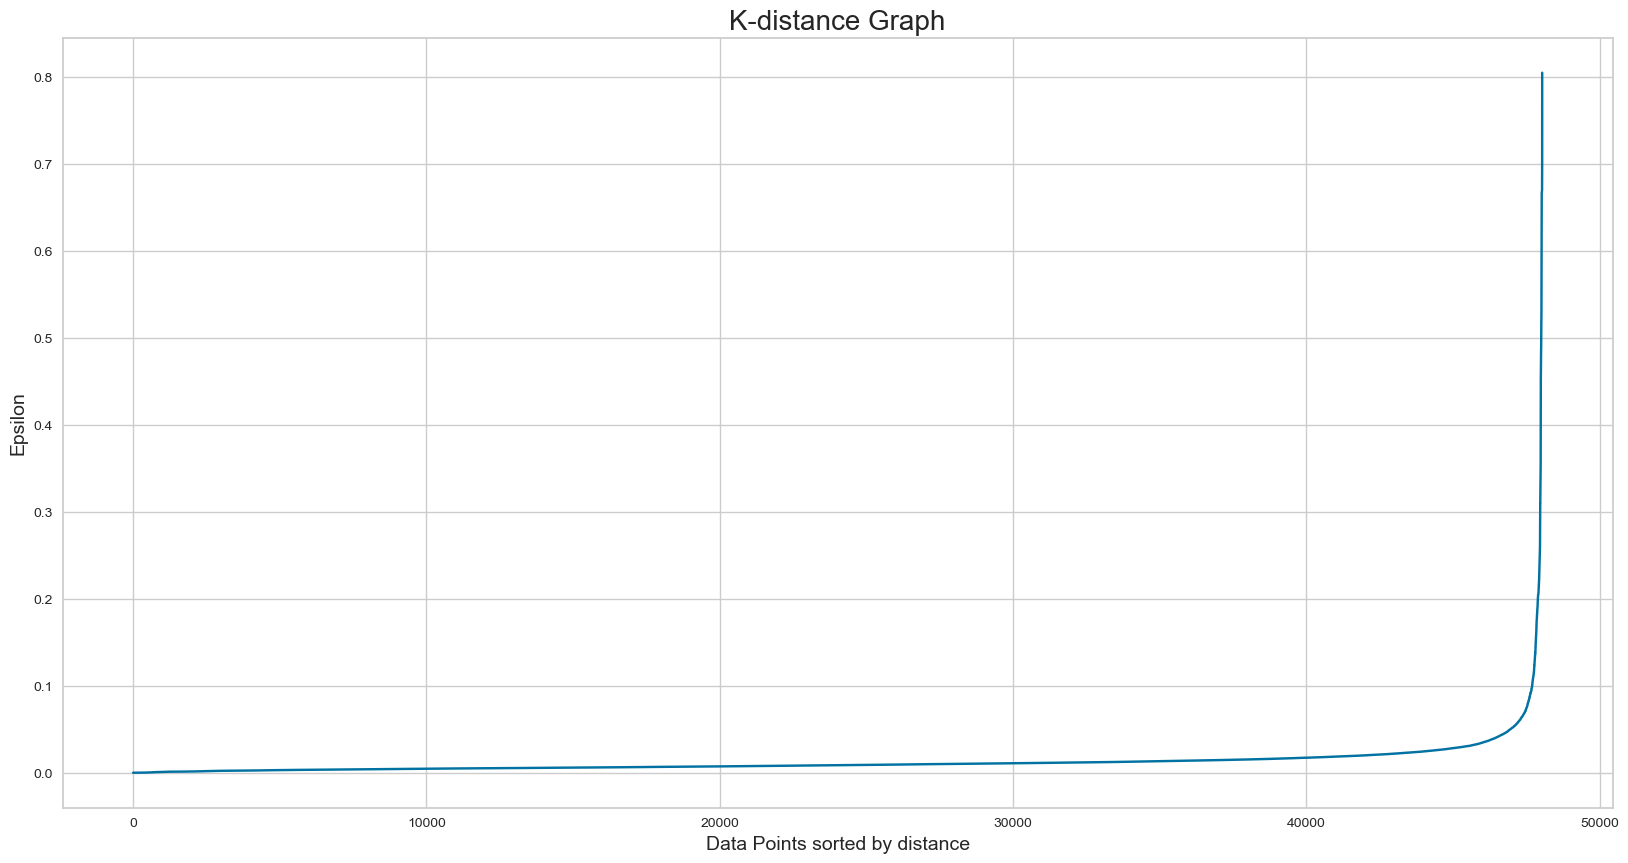

In [38]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_4.drop("realSum", axis=1))


distances, indices = nbrs.kneighbors(df_4.drop("realSum", axis=1))
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

In [39]:
dbscanpca=DBSCAN(eps=0.05)
dbscanpca.fit(df_4.drop("realSum", axis=1))
df_4['DBSCANlabels']=dbscanpca.labels_
silhouette_score(df_4.drop("realSum", axis=1), dbscanpca.labels_)

0.9077036431014697

In [74]:
len(pd.Series(dbscanpca.labels_).value_counts())

721

In [149]:
davies_bouldin_score(df_4.drop(columns="realSum"), dbscanpca.labels_)

0.0590933797334565

In [139]:
dbscanpca2=DBSCAN(eps=0.05)
dbscanpca2.fit(df_5.drop("realSum", axis=1))
df_5['DBSCANlabels']=dbscanpca2.labels_
silhouette_score(df_5.drop("realSum", axis=1), dbscanpca2.labels_)

0.568639890278257

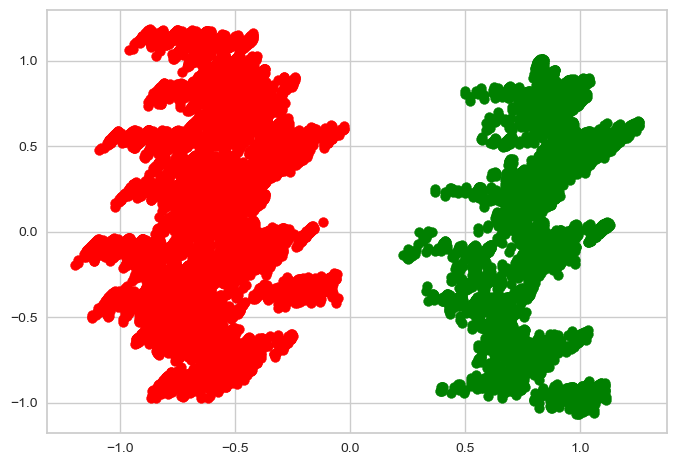

In [140]:
DBSCANVisualization = df_5.copy()
DBSCANVisualization["cluster"] = dbscanpca2.labels_
plt.scatter(DBSCANVisualization[DBSCANVisualization.cluster == 0].PC1, DBSCANVisualization[DBSCANVisualization.cluster == 0].PC2, c="green", s = 50)
plt.scatter(DBSCANVisualization[DBSCANVisualization.cluster == 1].PC1, DBSCANVisualization[DBSCANVisualization.cluster == 1].PC2, c="red", s = 50)

The PCA improved clustering

The number of clusters is 721 and cannot be visualised

## Regression

During this phase we will split the data to 75% training and 25% testing.
We will apply different types of regression including:
- Linear
- Ridge
- Lasso
- Elastic net
- Polynomial Degree 2

### Linear

In [226]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

linearRegression = linear_model.LinearRegression()
TrainX, TestX, TrainY, TestY = train_test_split(df_norm.drop("realSum", axis=1),df_norm.realSum, test_size = 0.25,random_state=0)
linearRegression.fit(TrainX, TrainY)
linearRegression.score(TrainX, TrainY)


0.569953902021858

In [227]:
from sklearn import metrics
LinearRegressionPredict = linearRegression.predict(TestX)
ScoreL = linearRegression.score(TestX, TestY)
MeanSquareErrorL = metrics.mean_squared_error(TestY, LinearRegressionPredict)**(1/2)
MeanAbsoluteErrorL = metrics.mean_absolute_error(TestY, LinearRegressionPredict)
ScoreL, MeanSquareErrorL, MeanAbsoluteErrorL

(0.57565579060655, 0.13445309138081146, 0.10152794079171605)

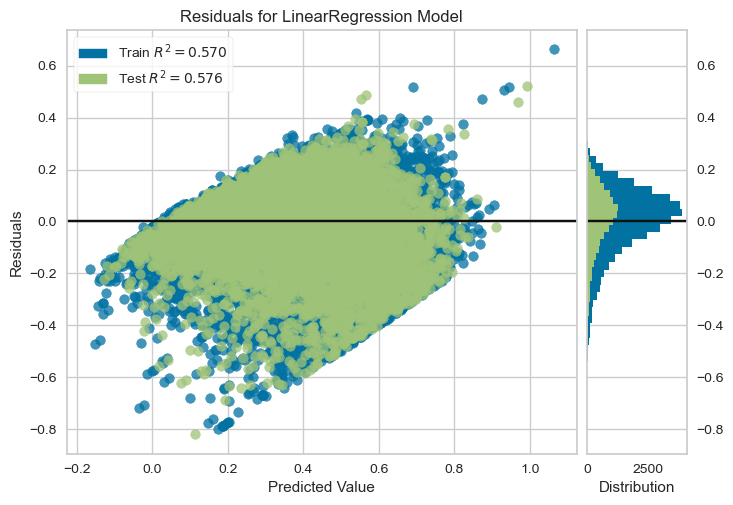

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [228]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear_model.LinearRegression())

visualizer.fit(TrainX, TrainY)  # Fit the training data to the visualizer
visualizer.score(TestX, TestY)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [231]:
linearRegression = linear_model.LinearRegression()
TrainXpca, TestXpca, TrainYpca, TestYpca = train_test_split(df_4.drop("realSum", axis=1),df_4.realSum, test_size = 0.25,random_state=0)
linearRegression.fit(TrainXpca, TrainYpca)
linearRegression.score(TrainXpca, TrainYpca)

0.6383308103353487

In [232]:
LinearRegressionPredictPca = linearRegression.predict(TestXpca)
ScoreLPca = linearRegression.score(TestXpca, TestYpca)
MeanSquareErrorLPca = metrics.mean_squared_error(TestYpca, LinearRegressionPredictPca)**(1/2)
MeanAbsoluteErrorLPca = metrics.mean_absolute_error(TestYpca, LinearRegressionPredictPca)
ScoreLPca, MeanSquareErrorLPca, MeanAbsoluteErrorLPca

(0.6445334959919686, 0.12305832331694634, 0.09331392898819467)

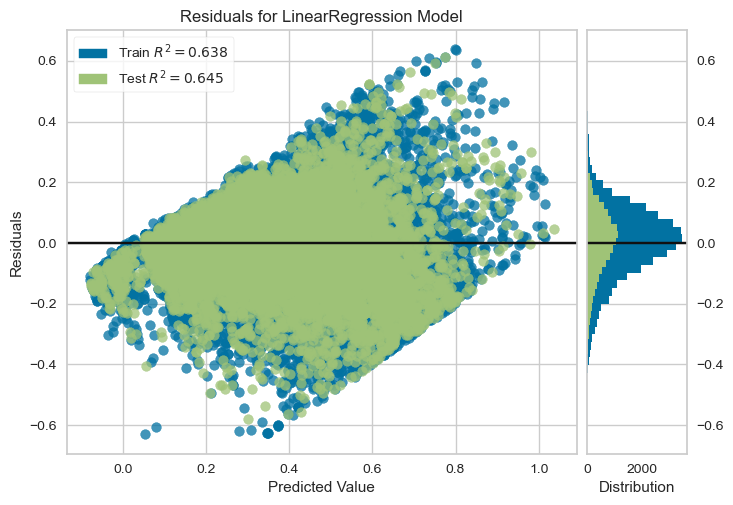

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [113]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear_model.LinearRegression())

visualizer.fit(TrainXpca, TrainYpca)  # Fit the training data to the visualizer
visualizer.score(TestXpca, TestYpca)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

### Ridge Regression

In [233]:
ridgeReg = linear_model.Ridge(alpha=.5)
ridgeReg.fit(TrainX,TrainY)
ridgeReg.score(TrainX, TrainY)

0.5698091951471754

In [234]:
RidgeRegressionPredict = ridgeReg.predict(TestX)
RidgeScoreL = ridgeReg.score(TestX, TestY)
RidgeMeanSquareErrorL = metrics.mean_squared_error(TestY, RidgeRegressionPredict)**(1/2)
RidgeMeanAbsoluteErrorL = metrics.mean_absolute_error(TestY, RidgeRegressionPredict)
RidgeScoreL, RidgeMeanSquareErrorL, RidgeMeanAbsoluteErrorL

(0.5755217500946739, 0.1344743250135817, 0.10154446639416903)

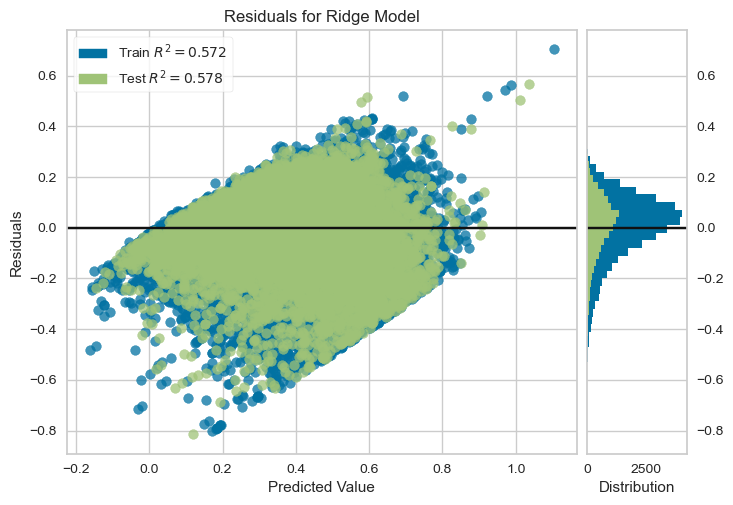

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [115]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear_model.Ridge(alpha=.5))

visualizer.fit(TrainX, TrainY)  # Fit the training data to the visualizer
visualizer.score(TestX, TestY)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [235]:
ridgeRegpca = linear_model.Ridge(alpha=.5)
ridgeRegpca.fit(TrainXpca,TrainYpca)
ridgeRegpca.score(TrainXpca, TrainYpca)

0.6383307978747974

In [236]:
RidgeRegressionPredictpca = ridgeRegpca.predict(TestXpca)
RidgeScoreLpca = ridgeRegpca.score(TestXpca, TestYpca)
RidgeMeanSquareErrorLpca = metrics.mean_squared_error(TestYpca, RidgeRegressionPredictpca)**(1/2)
RidgeMeanAbsoluteErrorLpca = metrics.mean_absolute_error(TestYpca, RidgeRegressionPredictpca)
RidgeScoreLpca, RidgeMeanSquareErrorLpca, RidgeMeanAbsoluteErrorLpca

(0.6445347461591613, 0.12305810692016615, 0.0933140398185918)

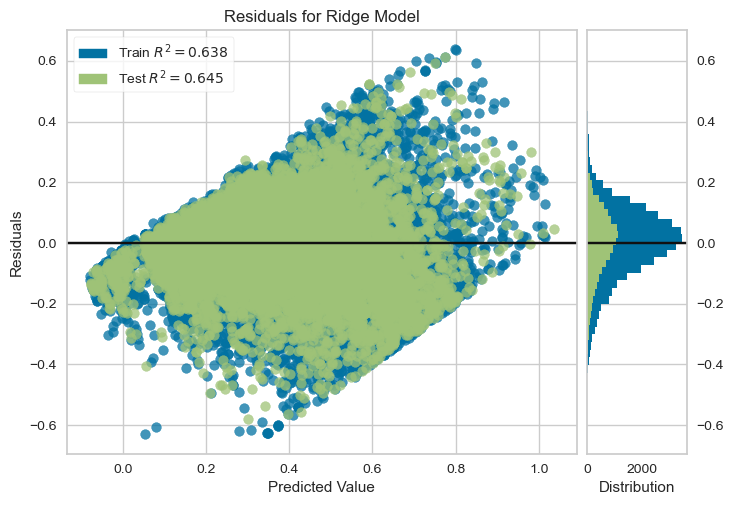

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [116]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear_model.Ridge(alpha=.5))

visualizer.fit(TrainXpca, TrainYpca)  # Fit the training data to the visualizer
visualizer.score(TestXpca, TestYpca)  # Evaluate the model on the test data
visualizer.show()   

### Lasso Regression

In [237]:
LassoReg = linear_model.Lasso(alpha=.01)
LassoReg.fit(TrainX,TrainY)
LassoReg.score(TrainX, TrainY)

0.30378020534574657

In [238]:
LassoRegressionPredict = LassoReg.predict(TestX)
LassoScoreL = LassoReg.score(TestX, TestY)
LassoMeanSquareErrorL = metrics.mean_squared_error(TestY, LassoRegressionPredict)**(1/2)
LassoMeanAbsoluteErrorL = metrics.mean_absolute_error(TestY, LassoRegressionPredict)
LassoScoreL, LassoMeanSquareErrorL, LassoMeanAbsoluteErrorL

(0.308809580747322, 0.1715973223950187, 0.13373758903025615)

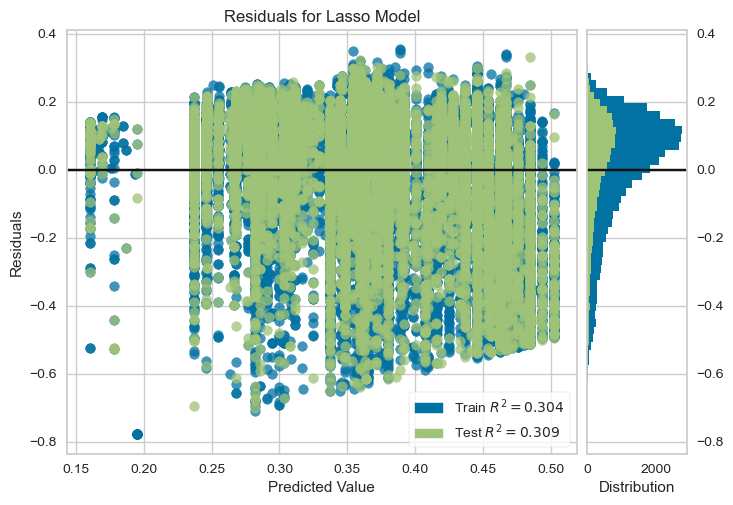

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [207]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear_model.Lasso(alpha=.01))

visualizer.fit(TrainX, TrainY)  # Fit the training data to the visualizer
visualizer.score(TestX, TestY)  # Evaluate the model on the test data
visualizer.show()   

In [239]:
LassoRegpca = linear_model.Lasso(alpha=.01)
LassoRegpca.fit(TrainXpca,TrainYpca)
LassoRegpca.score(TrainXpca, TrainYpca)

0.44978911028355806

In [240]:
LassoRegressionPredictpca = LassoRegpca.predict(TestXpca)
LassoScoreLpca = LassoRegpca.score(TestXpca, TestYpca)
LassoMeanSquareErrorLpca = metrics.mean_squared_error(TestYpca, LassoRegressionPredictpca)**(1/2)
LassoMeanAbsoluteErrorLpca = metrics.mean_absolute_error(TestYpca, LassoRegressionPredictpca)
LassoScoreLpca, LassoMeanSquareErrorLpca, LassoMeanAbsoluteErrorLpca

(0.4564497809277289, 0.15217085807487898, 0.11826679766417349)

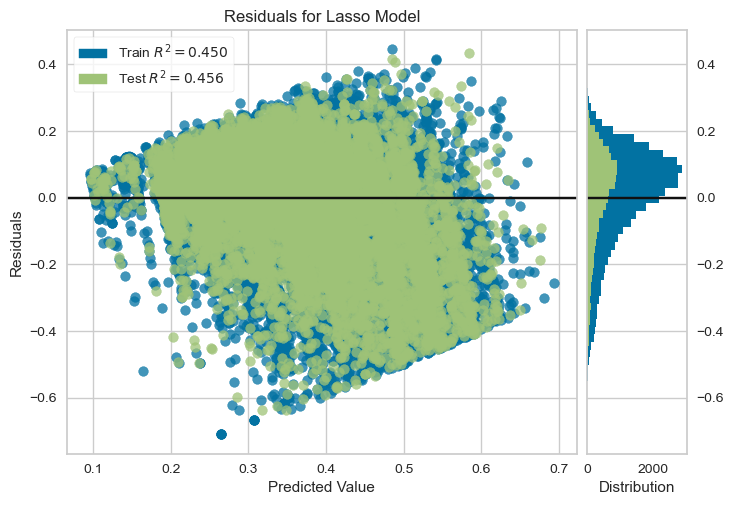

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [218]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(linear_model.Lasso(alpha=.01))

visualizer.fit(TrainXpca, TrainYpca)  # Fit the training data to the visualizer
visualizer.score(TestXpca, TestYpca)  # Evaluate the model on the test data
visualizer.show()   

### Elastic NET

In [241]:
from sklearn.linear_model import ElasticNet


ElasticNetReg = ElasticNet(alpha=0.01, l1_ratio=0.1)
ElasticNetReg.fit(TrainX,TrainY)
ElasticNetReg.score(TrainX, TrainY)

0.5065534222517496

In [242]:
ElasticNetRegressionPredict = ElasticNetReg.predict(TestX)
ElasticNetScoreL = ElasticNetReg.score(TestX, TestY)
ElasticNetMeanSquareErrorL = metrics.mean_squared_error(TestY, ElasticNetRegressionPredict)**(1/2)
ElasticNetMeanAbsoluteErrorL = metrics.mean_absolute_error(TestY, ElasticNetRegressionPredict)
ElasticNetScoreL, ElasticNetMeanSquareErrorL, ElasticNetMeanAbsoluteErrorL

(0.5127420745058777, 0.14407582262473076, 0.10924027109362554)

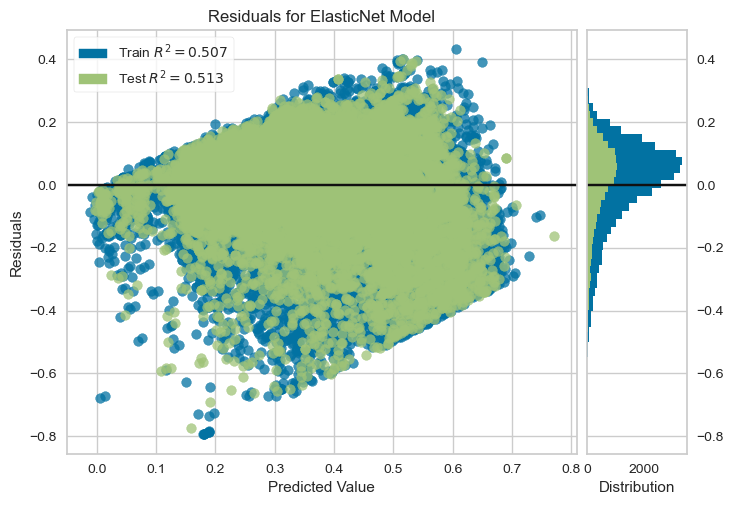

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [222]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(ElasticNet(alpha=0.01, l1_ratio=0.1))

visualizer.fit(TrainX, TrainY)  # Fit the training data to the visualizer
visualizer.score(TestX, TestY)  # Evaluate the model on the test data
visualizer.show()   

In [252]:
ElasticNetRegpca = ElasticNet(alpha=0.01, l1_ratio=0.1)
ElasticNetRegpca.fit(TrainXpca,TrainYpca)
ElasticNetRegpca.score(TrainXpca, TrainYpca)

0.627845018072983

In [244]:
ElasticNetRegressionPredictpca = ElasticNetRegpca.predict(TestXpca)
ElasticNetScoreLpca = ElasticNetRegpca.score(TestXpca, TestYpca)
ElasticNetMeanSquareErrorLpca = metrics.mean_squared_error(TestYpca, ElasticNetRegressionPredictpca)**(1/2)
ElasticNetMeanAbsoluteErrorLpca = metrics.mean_absolute_error(TestYpca, ElasticNetRegressionPredictpca)
ElasticNetScoreLpca, ElasticNetMeanSquareErrorLpca, ElasticNetMeanAbsoluteErrorLpca

(0.63467976752731, 0.12475228661994955, 0.09480192091620417)

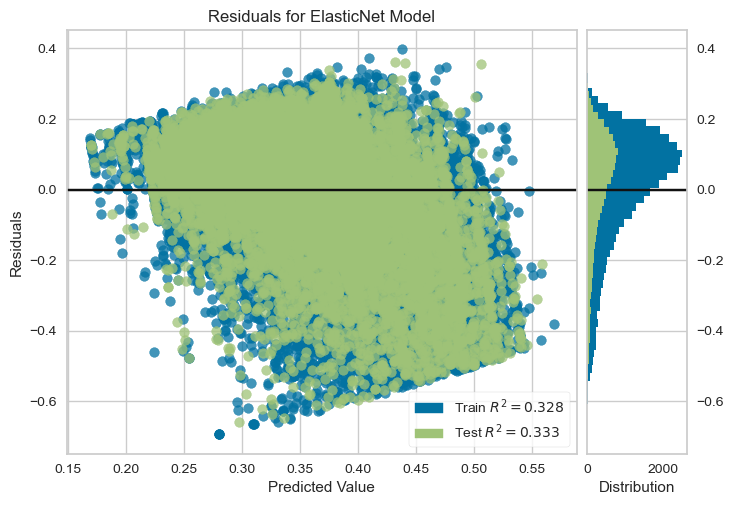

<Axes: title={'center': 'Residuals for ElasticNet Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [120]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(ElasticNet(alpha=0.1, l1_ratio=0.1))

visualizer.fit(TrainXpca, TrainYpca)  # Fit the training data to the visualizer
visualizer.score(TestXpca, TestYpca)  # Evaluate the model on the test data
visualizer.show()   

### Second Degree Polynomial

In [245]:
from sklearn.preprocessing import PolynomialFeatures
polynomialReg = PolynomialFeatures(degree=2)
TrainXpoly=polynomialReg.fit_transform(TrainX)
TestXpoly=polynomialReg.transform(TestX)
polynomialRegression=linear_model.LinearRegression()

polynomialRegression.fit(TrainXpoly, TrainY)
polynomialRegression.score(TrainXpoly, TrainY)


0.6565271517190867

In [246]:
PolyRegressionPredict = polynomialRegression.predict(TestXpoly)
PolyScoreL = polynomialRegression.score(TestXpoly, TestY)
PolyMeanSquareErrorL = metrics.mean_squared_error(TestY, PolyRegressionPredict)**(1/2)
PolyMeanAbsoluteErrorL = metrics.mean_absolute_error(TestY, PolyRegressionPredict)
PolyScoreL, PolyMeanSquareErrorL, PolyMeanAbsoluteErrorL

(0.6612090718511976, 0.12013720900860979, 0.08801678110769151)

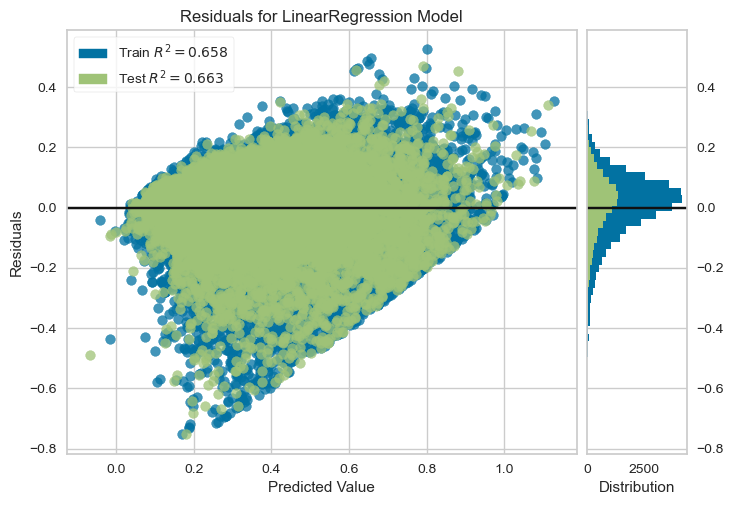

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [123]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(polynomialRegression)

visualizer.fit(TrainXpoly, TrainY)  # Fit the training data to the visualizer
visualizer.score(TestXpoly, TestY)  # Evaluate the model on the test data
visualizer.show()   

In [247]:

polynomialRegPca = PolynomialFeatures(degree=2)
TrainXpolyPca=polynomialReg.fit_transform(TrainXpca)
TestXpolyPca=polynomialReg.transform(TestXpca)
polynomialRegressionPca=linear_model.LinearRegression()

polynomialRegressionPca.fit(TrainXpolyPca, TrainYpca)
polynomialRegressionPca.score(TrainXpolyPca, TrainYpca)

0.9926237704370793

In [248]:
PolyRegressionPredictpca = polynomialRegressionPca.predict(TestXpolyPca)
PolyScoreLpca = polynomialRegressionPca.score(TestXpolyPca, TestYpca)
PolyMeanSquareErrorLpca = metrics.mean_squared_error(TestYpca, PolyRegressionPredictpca)**(1/2)
PolyMeanAbsoluteErrorLpca = metrics.mean_absolute_error(TestYpca, PolyRegressionPredictpca)
PolyScoreLpca, PolyMeanSquareErrorLpca, PolyMeanAbsoluteErrorLpca

(0.9927835781959266, 0.017533661059734047, 0.011635905765012269)

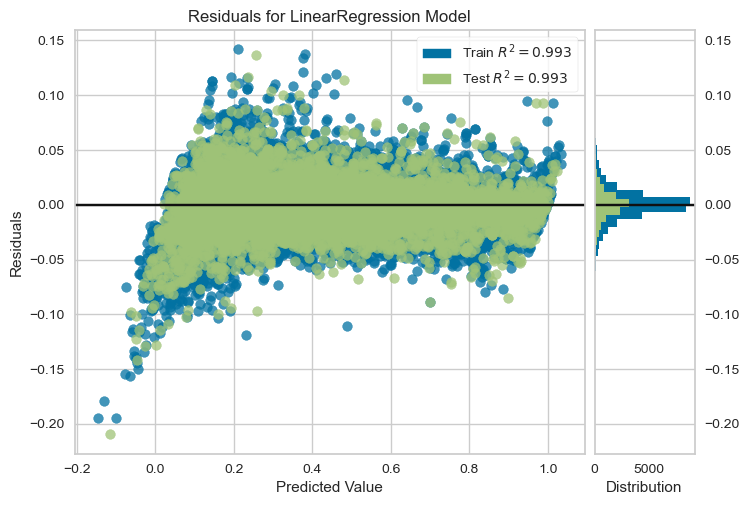

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [125]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(polynomialRegressionPca)

visualizer.fit(TrainXpolyPca, TrainYpca)  # Fit the training data to the visualizer
visualizer.score(TestXpolyPca, TestYpca)  # Evaluate the model on the test data
visualizer.show()   

## Discussion and Results

|Model|Training Accuracy Score|Testing Accuracy Score|Root Mean Squared Error|Mean Absolute Error|
|--|--|--|--|--|
|Linear Regression|0.5700|0.5757|0.1345|0.1015|
|Linear Regression PCA|0.6383|0.6445|0.1231|0.0933|
|Ridge Regression|0.5698|0.5755|0.1345|0.1012|
|Ridge Regression PCA|0.6383|0.6445|0.1231|0.0933|
|Lasso Regression α = 0.01|0.3038|0.3088|0.1716|0.1337|
|Lasso Regression PCA α = 0.01|0.4498|0.4564|0.1522|0.1182|
|Elastic Net Regression α = 0.01|0.5066|0.5127|0.1440|0.1092|
|Elastic Net Regression PCA α = 0.01|0.6278|0.6347|0.1248|0.0949|
|Second Degree Polynomial Regression|0.6565|0.6612|0.1201|0.0880|
|Second Degree Polynomial Regression PCA|0.9926|0.9928|0.0175|0.0116|

As seen from the table, the second degree polynomial pca regression is the most accurate model.
Ridge regression is better than the Lasso regression, therefore the l1 ration was chosen to be only 10% in the elastic net regression
Linear regression is not very accurate as the model is too simple to predict the data accurately, causing slight underfitting
The 12 dimentional PCA improved the performance of all algorithms in both testing and training data